In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('precision', 4)
np.set_printoptions(precision=3)

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-paper')

In [200]:
df = pd.read_csv("ts_predict.csv")
df['std_dt'] = pd.to_datetime(df['std_dt'])
df.index = df['std_dt']

In [201]:
ts = df['cpn_shop_rt'].sort_index()

ts[:10]

std_dt
2017-01-01    5.56
2017-01-02    5.57
2017-01-03    5.56
2017-01-04    5.42
2017-01-05    5.25
2017-01-06    5.20
2017-01-07    5.13
2017-01-08    5.23
2017-01-09    5.15
2017-01-10    5.08
Name: cpn_shop_rt, dtype: float64

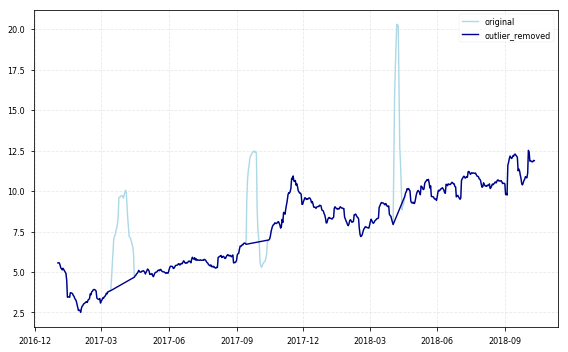

In [204]:
ts1 = ts.copy()

ts1.ix['2017-03-15':'2017-04-14'] = np.nan
ts1.ix['2017-09-15':'2017-10-14'] = np.nan
ts1.ix['2018-04-03':'2018-04-17'] = np.nan

ts1 = ts1.interpolate()

plt.figure(figsize=(8,5))

plt.plot(ts, color='lightblue', label='original')
plt.plot(ts1, color='darkblue', label='outlier_removed')

plt.legend(loc='best')
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [206]:
train = ts1[:-120]
test = ts1[-120:]

In [207]:
print(train.shape)
print(test.shape)
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

(529,)
(120,)
2017-01-01 00:00:00 2018-06-13 00:00:00
2018-06-14 00:00:00 2018-10-11 00:00:00


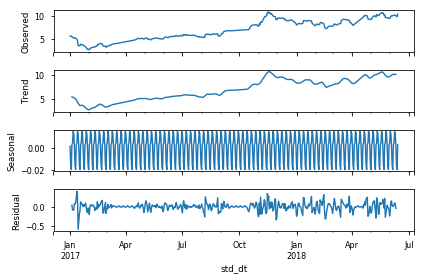

In [208]:
# Holt’s Linear Trend method
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

sm.tsa.seasonal_decompose(train).plot()
result = sm.tsa.stattools.adfuller(train)

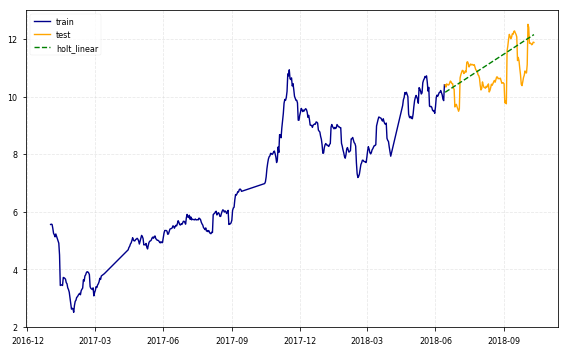

In [217]:
fit = Holt(np.asarray(train)).fit(smoothing_level=.3, smoothing_slope=.1)

y_hat = fit.forecast(len(test))
y_hat = pd.Series(y_hat)
y_hat.index = test.index

plt.figure(figsize=(8,5))
plt.plot(train, label='train', color='darkblue')
plt.plot(test, label='test', color='orange')
plt.plot(y_hat, label='holt_linear', color='green',linestyle='--')
plt.legend(loc='best')
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

In [210]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test, y_hat))
print(rmse)

0.6867811408062796


- Parameters:	
    - smoothing_level (float, optional) – The alpha value of the simple exponential smoothing
    - smoothing_slope (float, optional) – The beta value of the Holt’s trend method

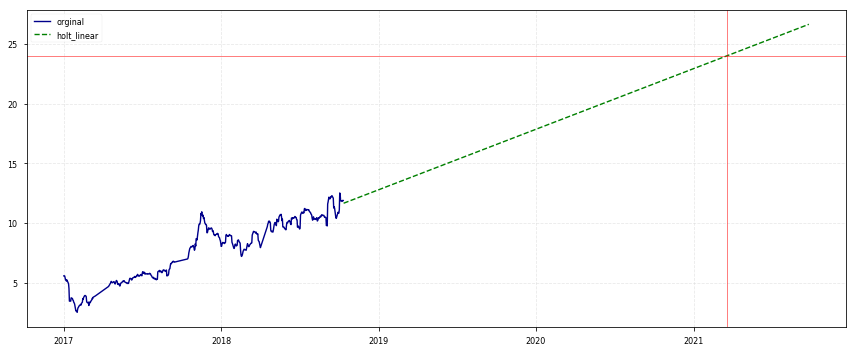

In [215]:
# predict future
fit = Holt(np.asarray(ts1)).fit(smoothing_level=.1, smoothing_slope=.1)

y_hat = fit.forecast(1080)
y_hat = pd.Series(y_hat)
y_hat.index = pd.date_range('2018-10-12', periods=1080, freq='D')

plt.figure(figsize=(12,5))
plt.plot(ts1, label='orginal', color='darkblue')
plt.plot(y_hat, label='holt_linear', color='green', linestyle='--')
plt.axhline(y=24, color='r', linewidth=.5)
plt.axvline(x='2021-03-19', color='r', linewidth=.5)

plt.legend(loc='best')
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')

plt.tight_layout()
plt.show()